## Linear Regression from scratch - to regress employee salaries

In [ ]:
import pandas as pd
import numpy as np

Load the Sample dataset

In [ ]:

df = pd.read_csv("Salary_dataset.csv")
df.head()
len(df)

30

Plotting the variables against each other

Text(0.5, 1.0, 'Experience and Salary')

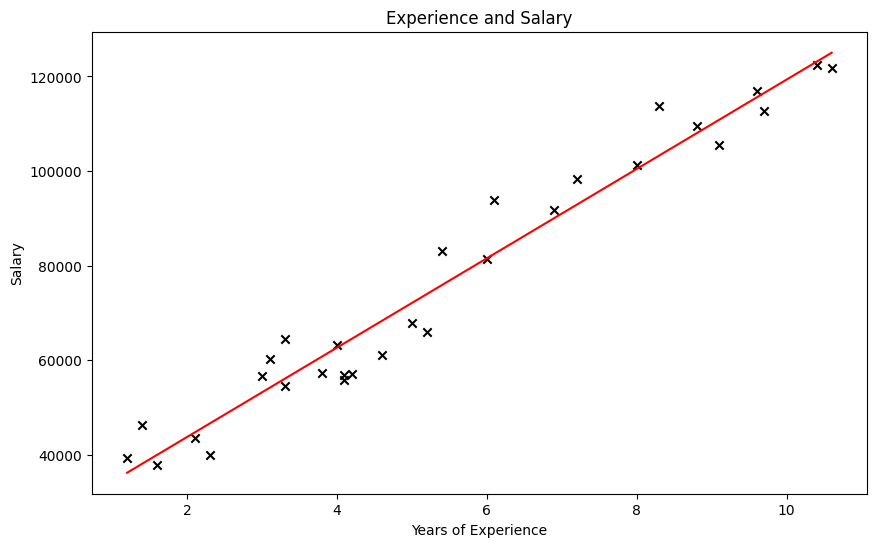

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

slope, intercept = np.polyfit(df['YearsExperience'], df['Salary'], 1)
bestFitLine = slope * df['YearsExperience'] + intercept
ax.plot(df['YearsExperience'], bestFitLine, color='red')

ax.scatter(df['YearsExperience'], df['Salary'], marker='x', color='black')
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Salary")
ax.set_title("Experience and Salary")

Defining Linear Regression function

In [ ]:
def LinearRegression(weight, x, bias):
    """Returns a prediction in y hat"""
    y_hat = (x * weight) + bias
    
    return y_hat

Defining our Loss Function - for Linear Regression, we use the Mean Squared Error, where y_hat(i) is the prediction compared to the real value in y(i)

![Screenshot 2025-07-14 145137.png](<attachment:Screenshot 2025-07-14 145137.png>)
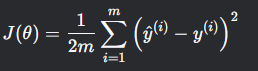

In [ ]:
def LinearLoss(weight, bias):
    
    dataSamples = len(df)
    sum = 0 
    
    X = df['YearsExperience'].values
    real_values = df['Salary'].values
    
    predictions = LinearRegression(weight, X, bias)
    squared_error_cost = (predictions - real_values) ** 2
    
    for i in squared_error_cost:
        sum += i
    
    return (1/(2 * dataSamples)) * sum

Backpropagation for Mean Squared Error to find derivatives for the weights and biases in Gradient descent

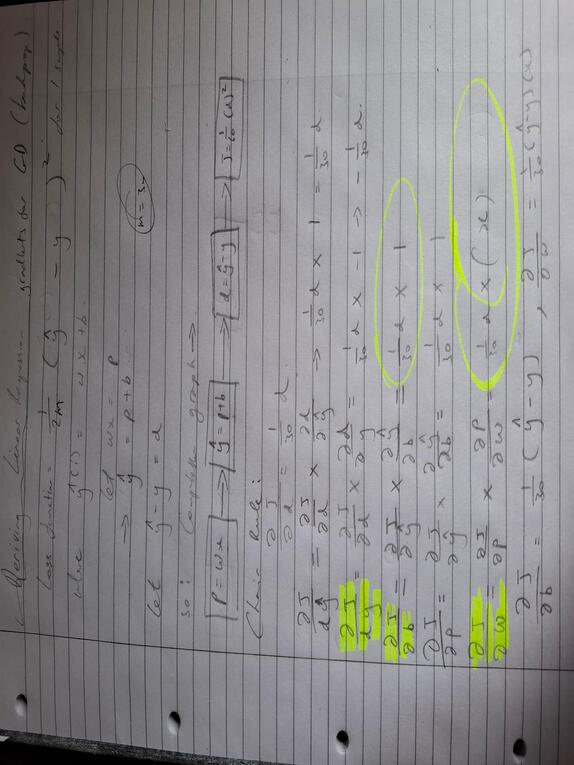

Defining gradients for weights and biases

In [ ]:
def weightGradient(prediction, realValue):
    
    gradient = (1/30) * (prediction - realValue) * (len(df))
    return gradient

def biasGradient(prediction, realValue):
    
    gradient = (1/30) * (prediction - realValue) 
    
    return gradient

Defining Gradient Descent for model training

![Screenshot 2025-07-14 145258.png](<attachment:Screenshot 2025-07-14 145258.png>)
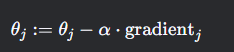

In [ ]:
def gradientDescent(learning_rate, epochs, X, y):
    m = 30
    w = 0.0
    b = 0.0 # initialise weights and biases to be 0
    
    for i in range(epochs):
        for x in range(m):
            
            y_hat = LinearRegression(weight=w, x=X[x], bias=b)
            gradientW = weightGradient(prediction = y_hat, realValue = y[x])
            gradientB = biasGradient(prediction = y_hat, realValue = y[x])
            
            w = w - (learning_rate * gradientW)
            b = b - (learning_rate * gradientB)
            
            print(f"""
                Current weight: {w}
                Current Bias: {b}  
                """)
    
    return w, b

In [ ]:
# Train model

finalWeight, finalBias = gradientDescent(learning_rate=0.01, epochs=50, X=df['YearsExperience'].values, y=df['Salary'].values)


                Current weight: 393.44
                Current Bias: 13.114666666666666  
                

                Current weight: 849.8606933333333
                Current Bias: 28.328689777777775  
                

                Current weight: 1213.2996353422222
                Current Bias: 40.44332117807407  
                

                Current weight: 1622.675909788255
                Current Bias: 54.08919699294182  
                

                Current weight: 1983.7334718931957
                Current Bias: 66.12444906310651  
                

                Current weight: 2489.990223245769
                Current Bias: 82.99967410819228  
                

                Current weight: 3013.4805295840683
                Current Bias: 100.44935098613558  
                

                Current weight: 3457.491178597933
                Current Bias: 115.2497059532644  
                

                Current weight: 3986.7014726446687
         

In [ ]:
print(f"""
    Final Weights:
    
    w = {finalWeight},
    b = {finalBias}  
    
      """)


    Final Weights:

    w = 12969.17675255759,
    b = 432.30589175191994  

      


Model Metrics - Using mean absolute error on original data

it is (prediction - real value) 
added up and divided by number of samples (30) 

In [ ]:
def meanAbsoluteError(weights, bias):
    X = df['YearsExperience'].values
    y = df['Salary'].values
    
    predictions = LinearRegression(weight=weights, bias=bias, x=X)
    print(predictions)
    sum = 0
    
    for i in range(30):
        error = (y[i] - predictions[i])
        sum += error
    
    return sum/30 
    

In [ ]:
meanAbsoluteError(finalWeight, finalBias)

[ 15995.31799482  18589.15334533  21182.98869584  27667.57707212
  30261.41242263  39339.83614942  40636.75382468  43230.58917519
  43230.58917519  49715.17755147  52309.01290198  53605.93057724
  53605.93057724  54902.84825249  60090.51895352  65278.18965454
  67872.02500505  70465.86035556  78247.3664071   79544.28408235
  89919.6254844   93810.37851017 104185.71991221 108076.47293798
 114561.06131426 118451.81434003 124936.4027163  126233.32039156
 135311.74411835 137905.57946886]


np.float64(5365.217287736321)